# RLC Network Response - Compare Impulse and Step Responses

In [5]:
from os.path import exists
file_exists = exists('basic_material.py')

if (not file_exists):
    !wget -O basic_material.py https://raw.githubusercontent.com/JonHowMIT/Signals_and_Systems/main/basic_material.py
%run basic_material

try:
    import lcapy
except ModuleNotFoundError:
    print("Could not find lcapy - installing")
    !sudo apt install texlive-latex-recommended # takes about 30 sec
    !sudo apt-get install texlive-latex-extra --no-install-recommends # 10 sec
    !sudo apt install imagemagick # 10 sec
    !pip install sympy==1.10.1
    !pip install lcapy # takes 5 sec
    !pip install pdflatex # takes about 5 sec
    print("Will need to restart the Kernel")

from lcapy import Circuit, j, omega, s, exp, delta, t, u 
#from lcapy import *


Running Python: 3.12.4
Running Sympy: 1.13.2


## Consider impulse response of the RLC network

Impulse input


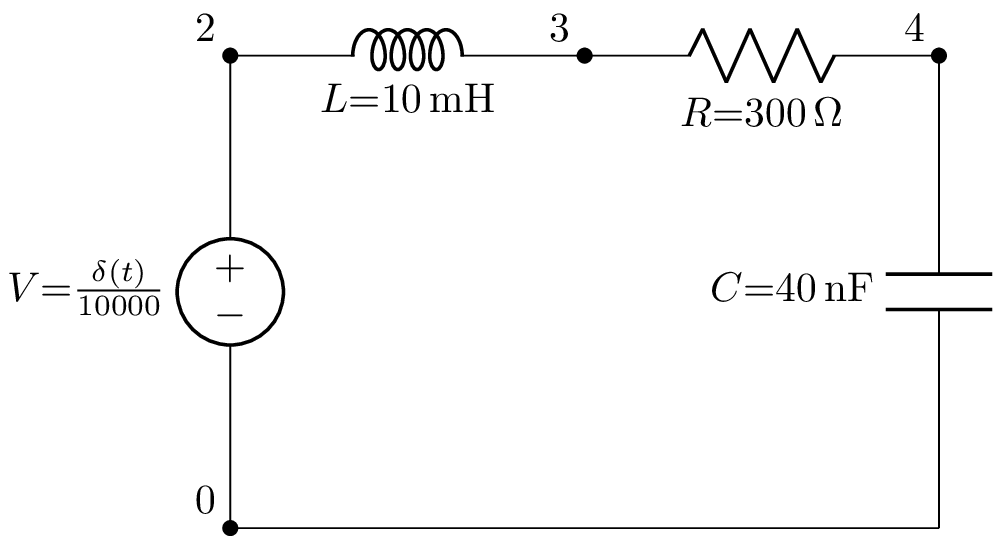

In [6]:
RR = 300 # resistor
CC = 40e-9 # capacitor value
LL = 10e-3 # inductor value
scale = 1e-4 # scale factor needed for impulse conversion
V1 = scale*delta(t) # scaled delta
V2 = u(t) # step

cct7 = Circuit("""
V 2 0 Vin;  down=2
L 2 3 L 0; right=1.5
R 3 4 R ; right=1.5
C 4 0_4 C 0; down=1.5
W 0 0_4; right""")

cct7a = cct7.subs({'Vin': V1, 'R': RR, 'C':CC, 'L':LL})
print("Impulse input")
cct7a.draw()

Step input


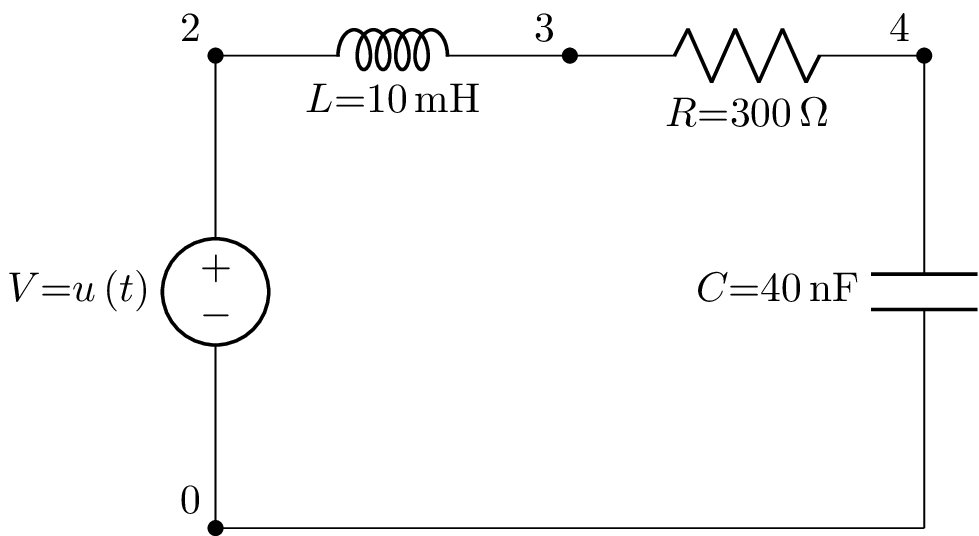

In [7]:
cct7b = cct7.subs({'Vin': V2, 'R': RR, 'C':CC, 'L':LL})
print("Step input")
cct7b.draw()

In [8]:
# Define variables that govern the system response

# Natural Freq
wn = 1/np.sqrt(LL*CC)
# Damping value
zeta = RR/LL/2/wn
# Damped Freq
wd = wn*np.sqrt(1-zeta**2)

print(f"\tFrequency \t= {wn:.1f} rad/sec")
print(f"\tDamped Freq \t= {wd:.1f} rad/sec")
print(f"\tDamping ratio \t= {(zeta):.2f}")
print(f"\tReal part \t= {(-zeta*wn):.1f}") 

	Frequency 	= 50000.0 rad/sec
	Damped Freq 	= 47697.0 rad/sec
	Damping ratio 	= 0.30
	Real part 	= -15000.0


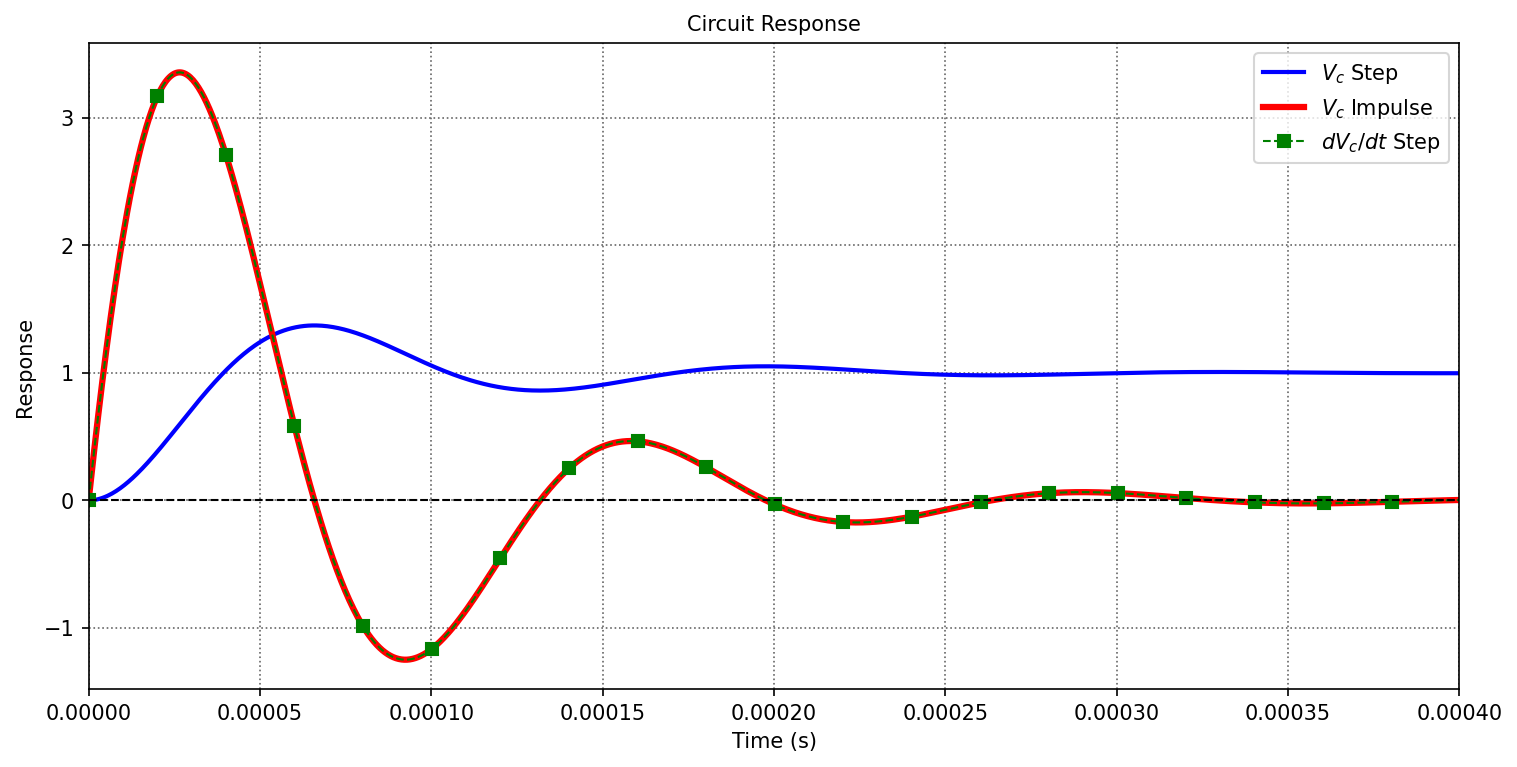

Plot numerically confirms that the derivative of the step response is the same as the impulse reponse


In [16]:
# Compute time response
tt = np.linspace(0, 4e-4, 1000)
tt2 = np.linspace(1e-12, 4e-4, 50)
vc_impulse = cct7a.C.v.evaluate(tt) # capacitor voltage
vc_step = cct7b.C.v.evaluate(tt) # capacitor voltage
vc_step_diff = cct7b.C.v.differentiate(t)

fig = figure(figsize=(10, 5),dpi=150,constrained_layout = True)
ax = fig.add_subplot(111, title='Circuit Response')
ax.plot(tt, vc_step, linewidth=2, color='blue', label='$V_c$ Step')
ax.plot(tt, vc_impulse, linewidth=3, color='red', label='$V_c$ Impulse')
ax.plot(tt, scale*vc_step_diff.evaluate(tt), 'gs--', linewidth=1, label='$dV_c/dt$ Step',markevery=50)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Response');
nicegrid(ax)
plt.legend()
plt.show()

txt = 'Plot numerically confirms that the derivative of the step response is the same as the impulse reponse'
print(Style.BRIGHT + Fore.GREEN + txt + Style.RESET_ALL)